<a href="https://colab.research.google.com/github/ShoSato-047/R_review/blob/main/STAT380_2_1_(2025)_Probability_models_for_Y_Motivation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Motivating probability models

In STAT 360, pretty much all of the modeling scenarios looked something like this (in the simple case with a single $X$):

<center>
<img width = "50%" src="https://bookdown.org/roback/bookdown-BeyondMLR/bookdown-BeyondMLR_files/figure-html/OLSassumptions-1.png">  
<figcaption> <a href="https://bookdown.org/roback/bookdown-BeyondMLR/ch-MLRreview.html#assumptions-for-linear-least-squares-regression"> Image source: Beyond Multiple Linear Regression, Fig 1 </a> </figcaption>
</center>

Focus on the red bell curves.  These curves represent the distribution of $Y_i$ given $X_i$.  The fact that these are bell curves (symmetric, with heaviest weight around the regression line) implies that $Y_i|X_i$ ("$|$" means "given") follow a *normal distribution.*  In many cases however, $Y_i|X_i$ might not be normal - in fact it might not even be continuous!  Let's take a look at some examples.  In each example, we will *simulate* $Y_i|X_i$ from different distributions and take a look at the resulting relationship.  We will also superimpose the model we would fit using STAT 360 methods.  Some of them might look okay, some will not!

In all of the cases, we will use the same set of $X$, 5000 randomly-generated numbers between 0 and 1:

In [1]:
set.seed(12325)
x <- runif(5000, min = 0, max = 1)

In [2]:
library(ggplot2)

We will explore the following plots:

1. A plot of the *marginal* distribution of $Y$ (what $Y$ looks like if we ignore $X$);
2. A plot of the relationship between $Y$ and $X$ - this shows us the *conditional* distribution $Y|X$, with the line we would fit using STAT 360 methods;
3. A normal q-q plot of the residuals from the simple linear regression.

# Example 1 - $Y|X$ is *normally distributed.*

Let's first consider a well-behaved case that *could* be handled easily with STAT 360 methods.

In [3]:
y1 <- rnorm(5000, mean = 0.5 + 1.5*x, sd = 0.3)

Investigating the marginal distribution of $Y$:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


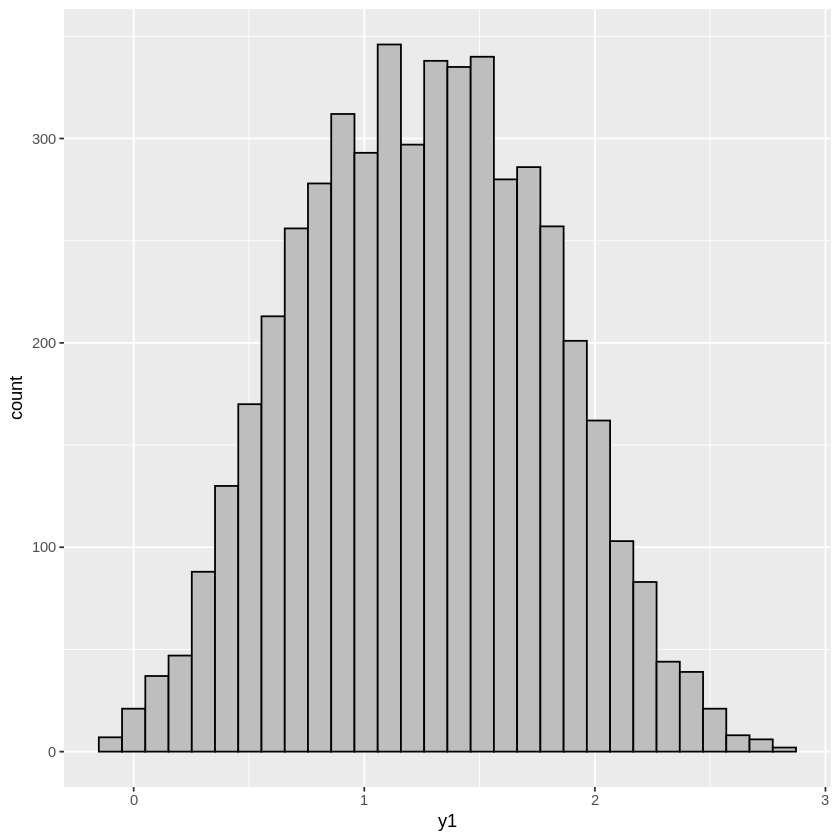

In [4]:
ggplot() +
  geom_histogram(aes(x = y1), fill = 'grey',col='black')

Next let's plot $Y$ vs $X$ from this simulation, and the QQ plot of the residuals from the fit:

`geom_smooth()` using formula = 'y ~ x'


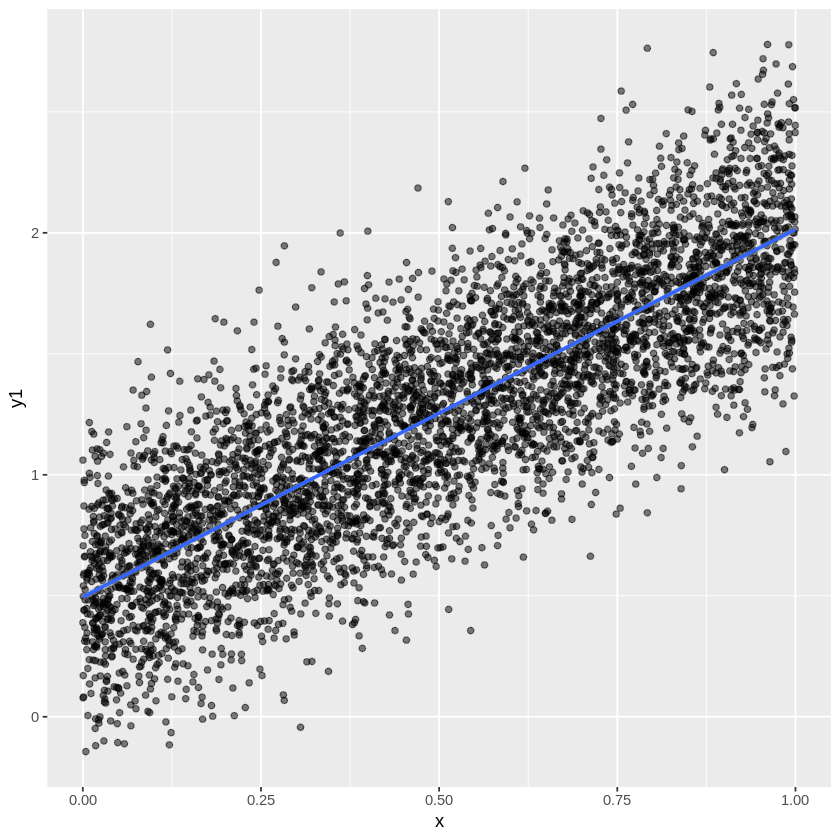

In [5]:
ggplot() +
  geom_point(aes(x = x, y = y1),alpha = 0.5) +
  geom_smooth(aes(x = x, y = y1),method='lm')

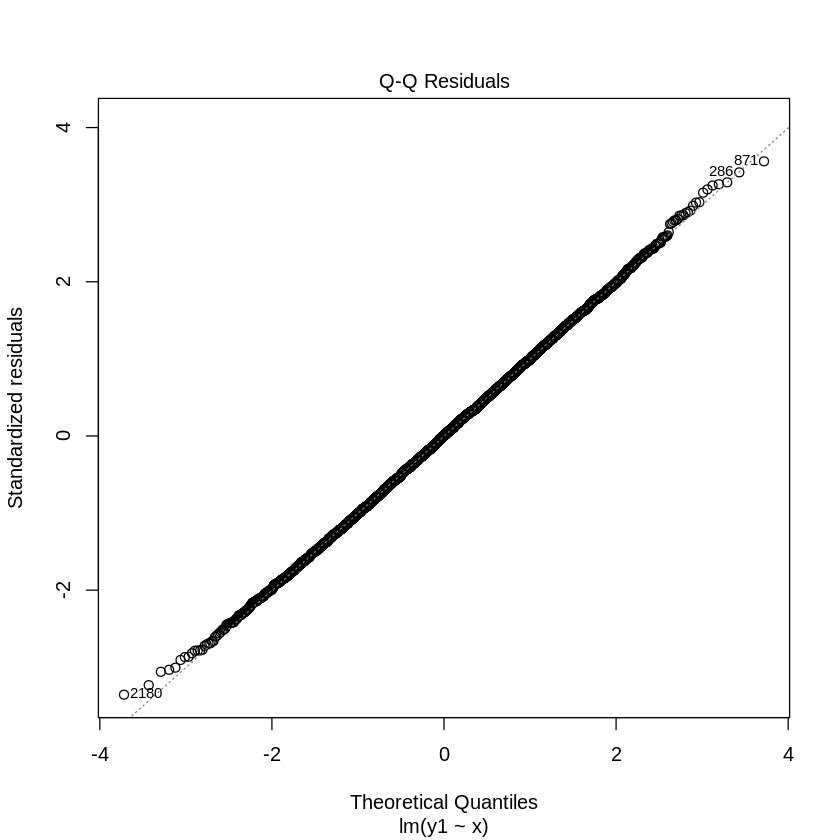

In [6]:
fit_ex1 <- lm(y1~x)
plot(fit_ex1, which = 2)

* How is the distribution of $Y|X$ reflected in the scatterplot of $X$ vs $Y$?
* How is it reflected in the QQ plot of the fitted residuals?

# Example 2 - $Y|X$ is *uniformly distributed.*

Next, let's consider some $Y$ that are still symmetric around the regression line, but don't have "bell curves":

In [7]:
# uniform data
y2 <- runif(5000, min = 0.5 + 1.5*x -1, max = 0.5 + 1.5*x +1)

Plotting a histogram of our $Y_i$ marginally (unconditional on $X$):

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


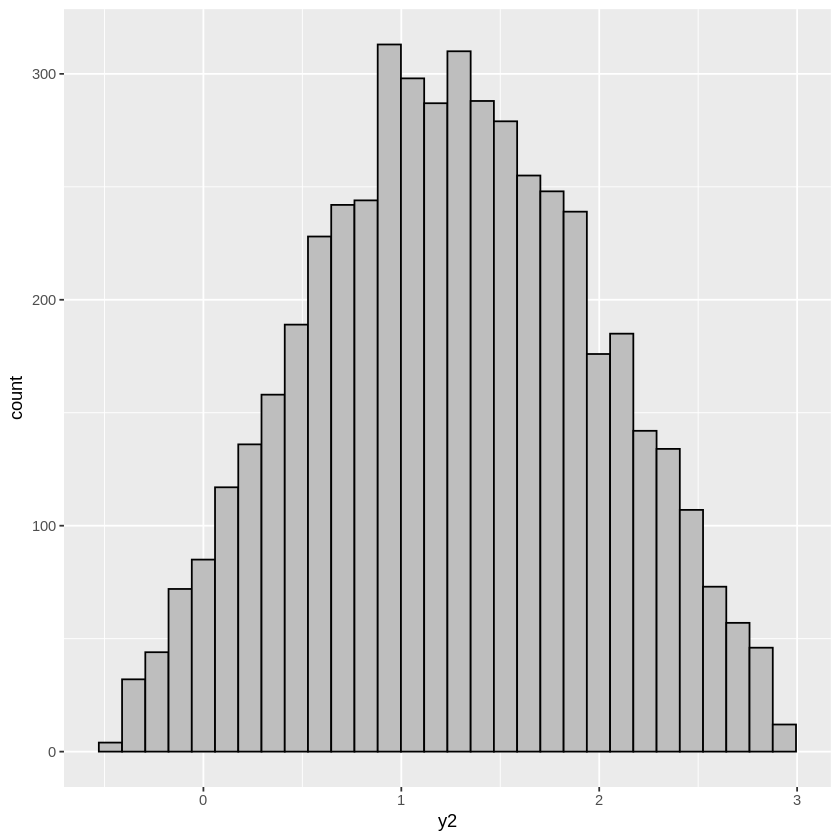

In [8]:
# almost no tails
ggplot() +
  geom_histogram(aes(x = y2), fill = 'grey',col='black')

Next, we'll look at the relationship of $Y$ with $X$:

`geom_smooth()` using formula = 'y ~ x'


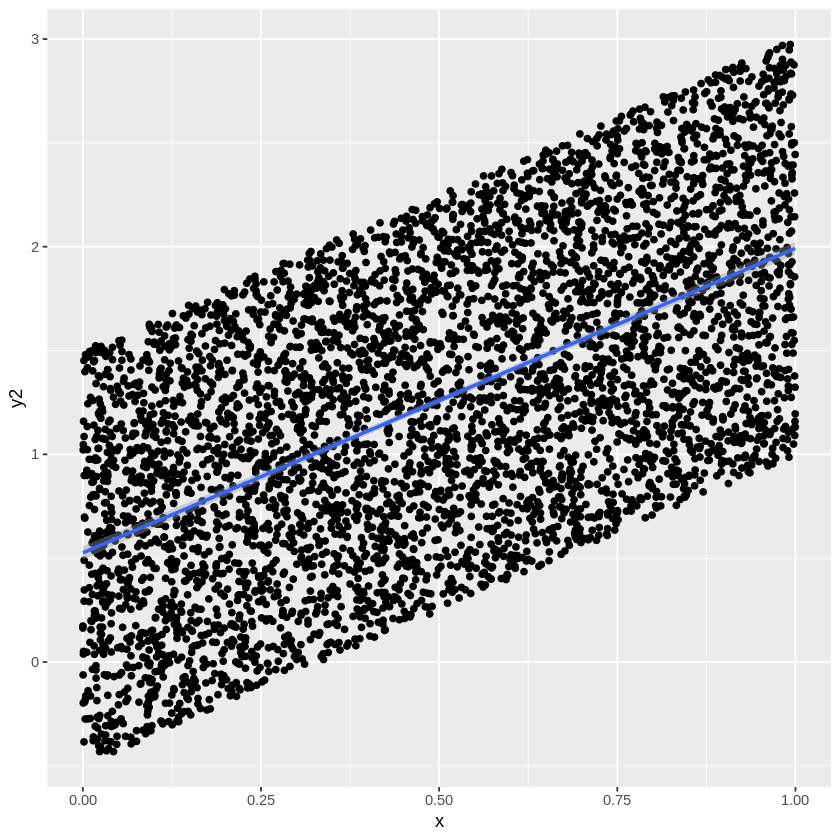

In [9]:
# pints are not close to the regression line
ggplot() +
  geom_point(aes(x = x, y = y2)) +
  geom_smooth(aes(x = x, y = y2),method='lm')

If we were to plot the conditional distribution of $Y|X$, it might look something more like this:

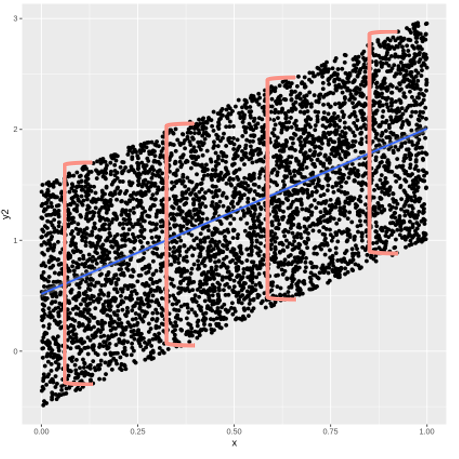

A q-q plot of the residuals will also illustrate the non-normal nature of $Y|X$:

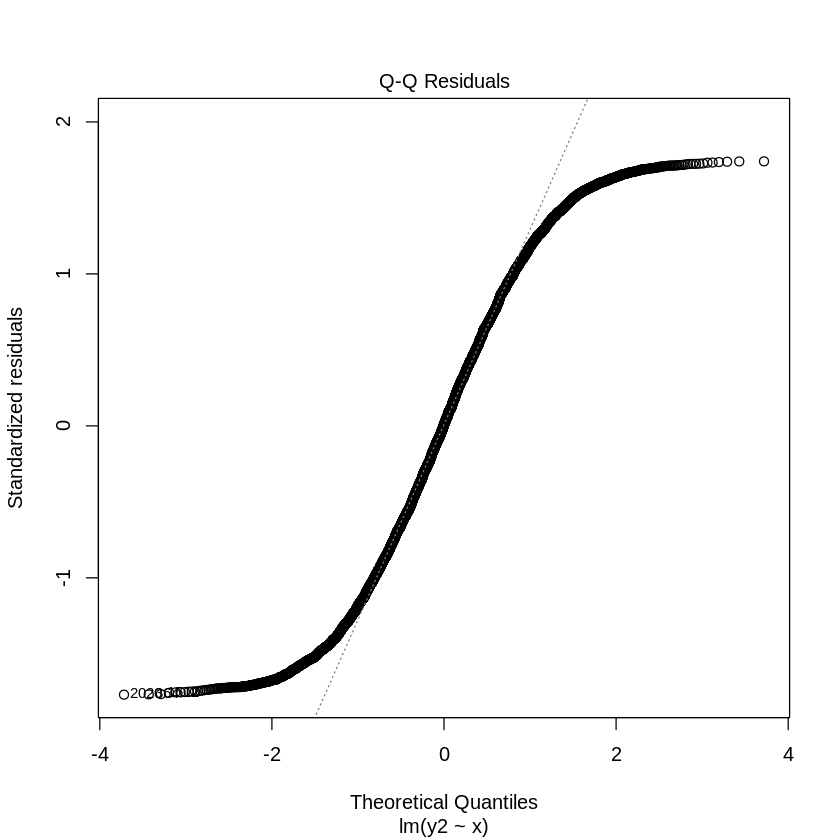

In [10]:
# fat tails - large residulas
fit_ex2 <- lm(y2~x)
plot(fit_ex2, which = 2)

# Example 3 - $Y|X$ is *skewed.*

In our next example, the regression line will still correctly describe the conditional mean $E(Y|X)$, but the $Y|X$ will no longer even be symmetric about that line.

In [11]:
epsilon3 <- rgamma(5000, shape = 2, scale = 0.5) -1
y3 <- 0.5 + 1.5*x + epsilon3

Plotting a histogram of our $Y_i$ marginally (unconditional on $X$):

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


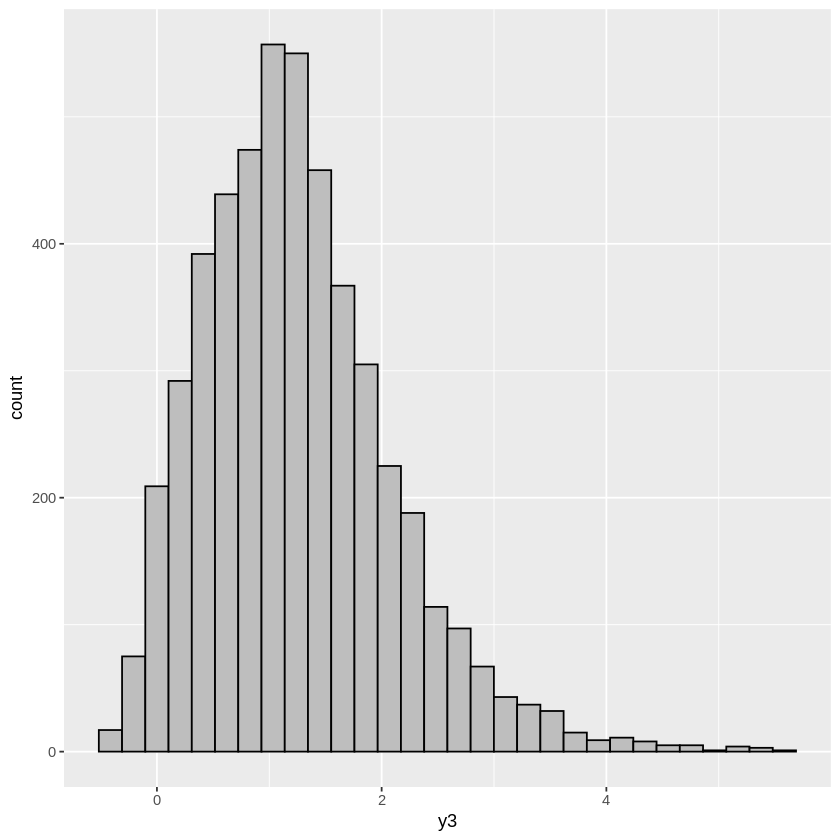

In [12]:
ggplot() +
  geom_histogram(aes(x = y3), fill = 'grey',col='black')

Next, we'll look at the relationship of $Y$ with $X$:

`geom_smooth()` using formula = 'y ~ x'


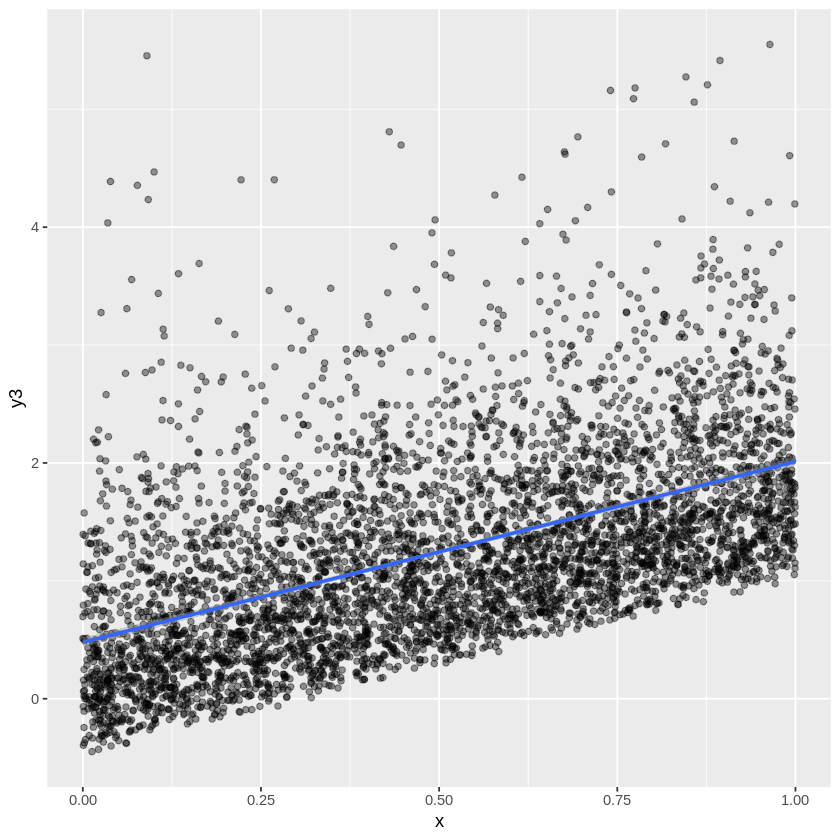

In [13]:
# distribution is not symmetric
# most residuals are below the average line
ggplot() +
  geom_point(aes(x = x, y = y3), alpha = 0.4) +
  geom_smooth(aes(x = x, y = y3),method='lm')

...and a normal q-q plot of the residuals:

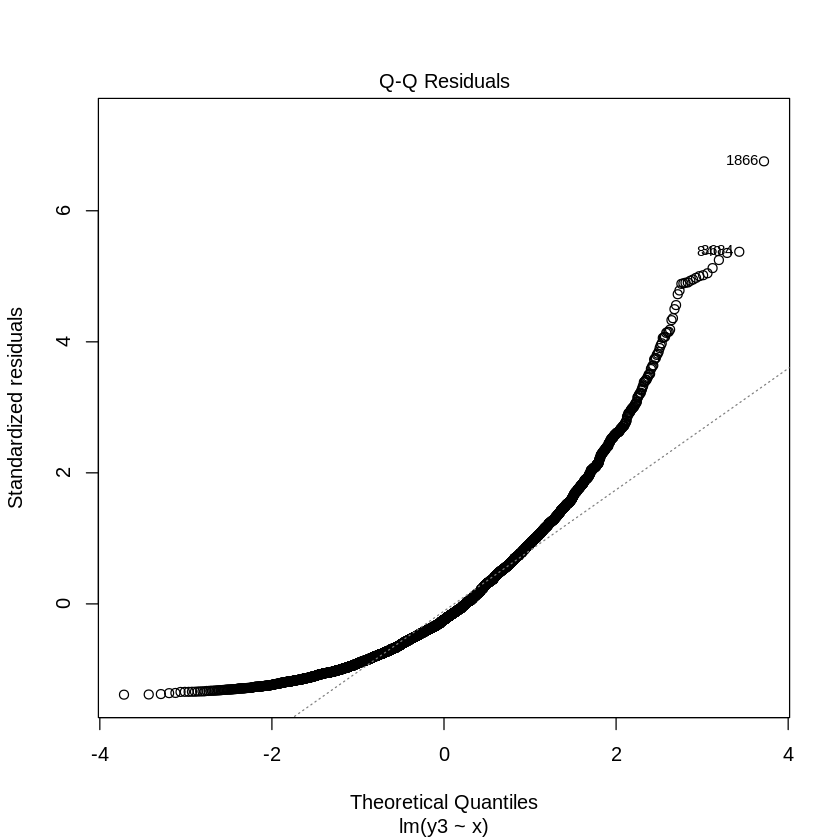

In [14]:
fit_ex3 <- lm(y3~x)
plot(fit_ex3, which = 2)

# Example 4 - $Y|X$ is *discrete*


In the examples we've considered so far, $Y$ has at least been continuous (a decimal).  But what about if $Y$ is a discrete variable (i.e., only integer valued)?

In [15]:
mu <- exp(0.5 + 1.5*x)
y4 <- rpois(5000, mu)

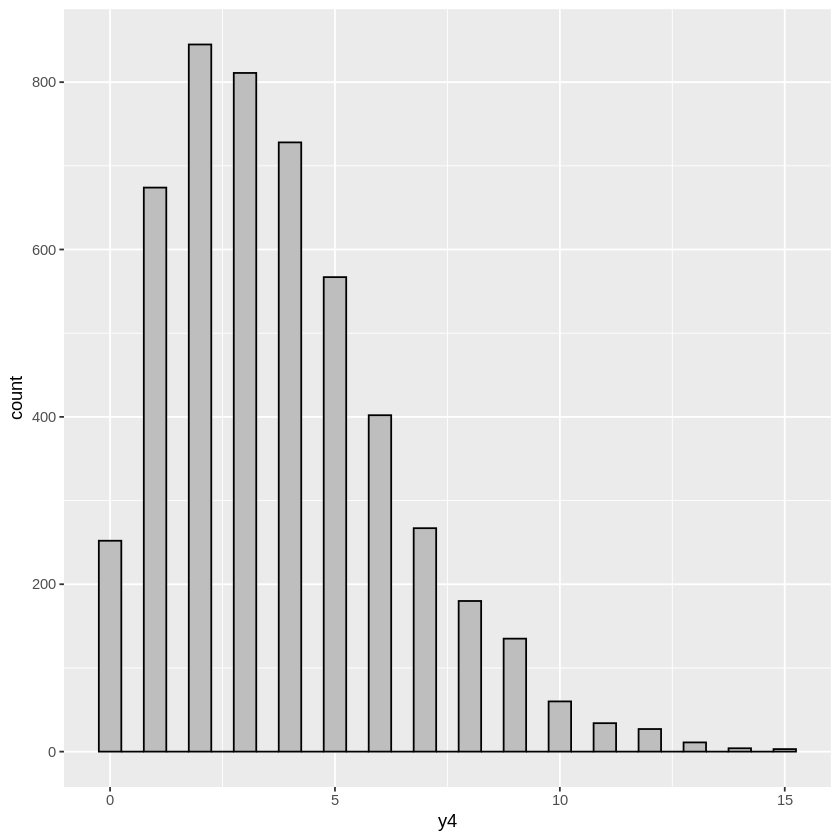

In [16]:
ggplot() +
  geom_histogram(aes(x = y4), fill = 'grey',col='black', binwidth = 0.5)

* In what important way does the distribution of this response $Y$ differ from the previous 3 examples?

In [17]:
# only takes on integer values (discrete)

`geom_smooth()` using formula = 'y ~ x'


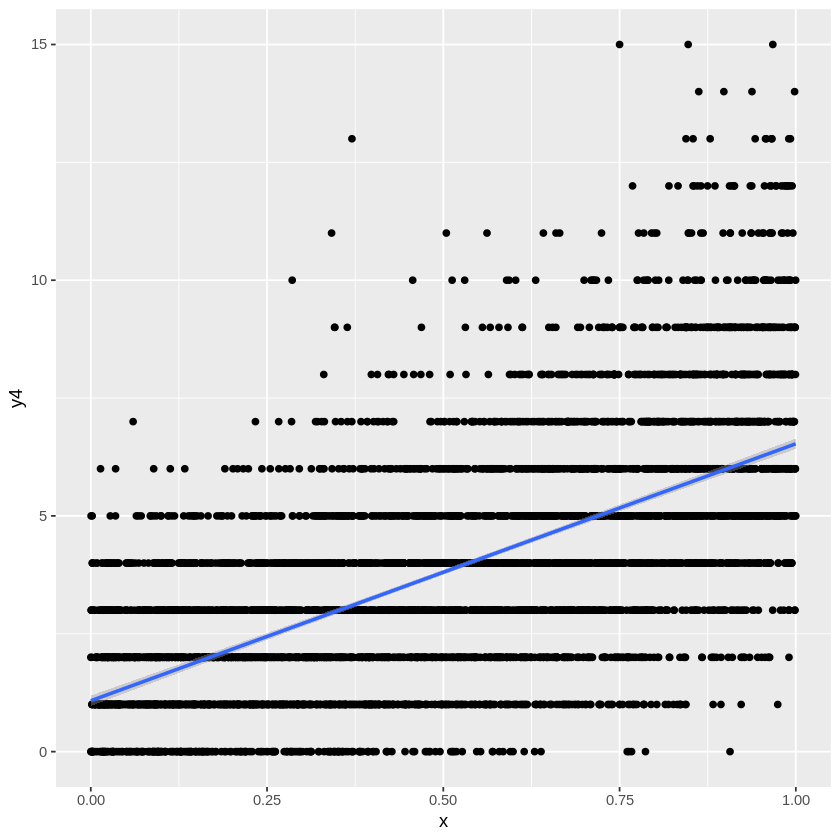

In [18]:
ggplot() +
  geom_point(aes(x = x, y = y4)) +
  geom_smooth(aes(x = x, y = y4),method='lm')

* How is the distribution of the $Y$ reflected in the scatterplot of $X$ vs $Y$?

Examining a normal q-q plot of the residuals:

In [ ]:
# We can see the discrete nature of Y in the horizontal bands (ex. 1, 2, 3 . . .).

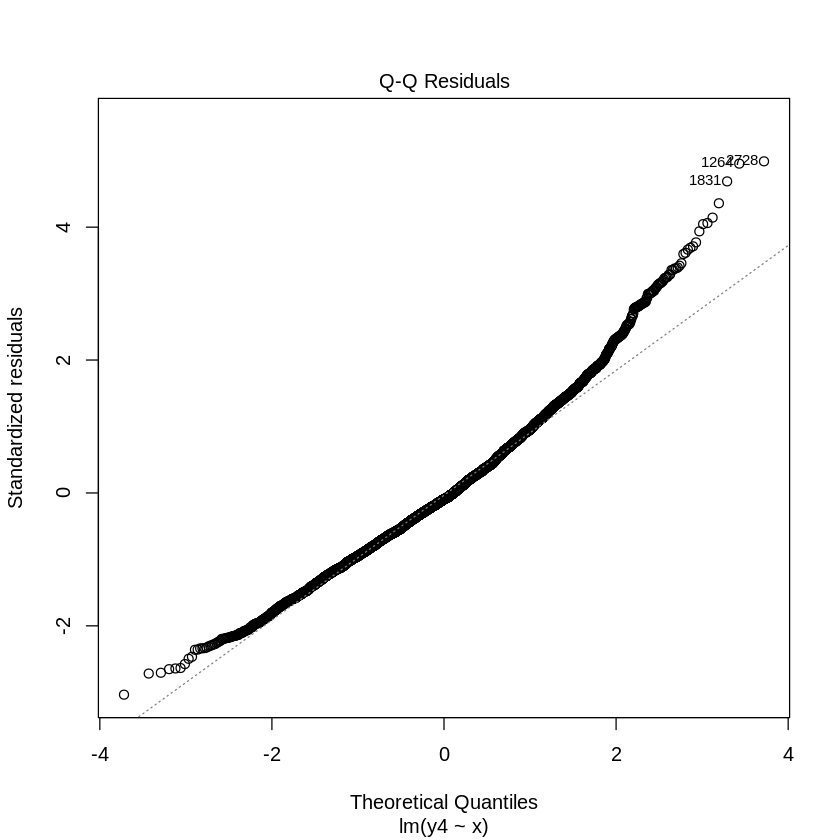

In [19]:
fit_ex4 <- lm(y4~x)
plot(fit_ex4, which = 2)

# Example 5 - $Y|X$ is *binary*.

In many cases, the $Y$ we want to model is a binary variable, indicating whether or not an event has occurred.  What would a STAT 360 approach look like here?

In [20]:
mu <- exp(0.5 + 1.5*x)/(1+exp(0.5 + 1.5*x))
y5 <- rbinom(5000, size = 1, p =  mu)

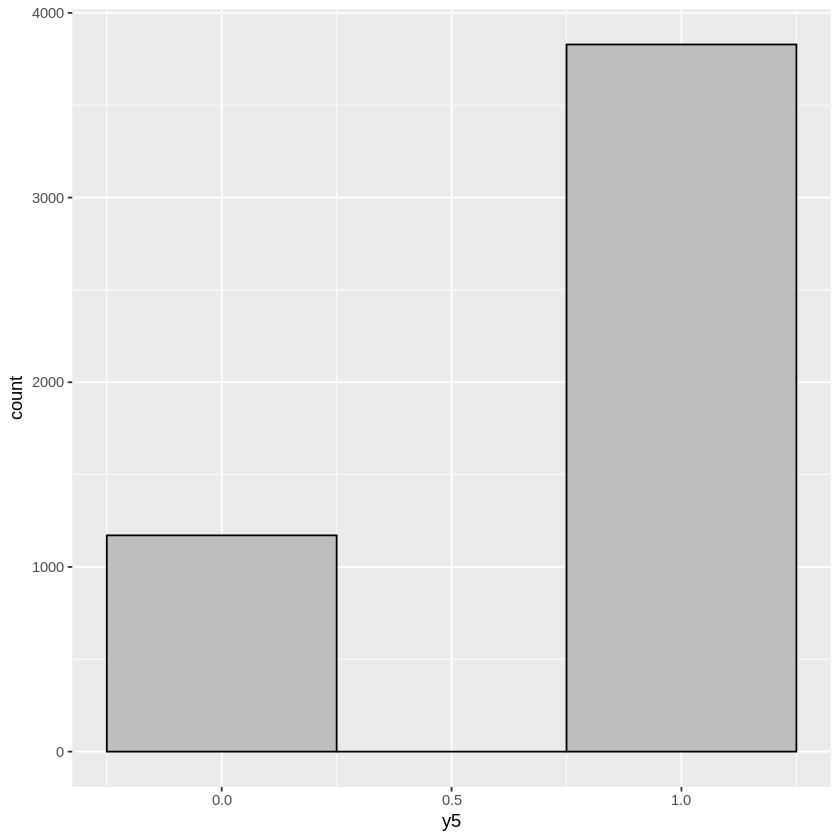

In [21]:
ggplot() +
  geom_histogram(aes(x = y5), fill = 'grey',col='black', binwidth = 0.5)

Plotting the relationship of $Y$ with $X$, and plotting the simple linear regression line:

`geom_smooth()` using formula = 'y ~ x'


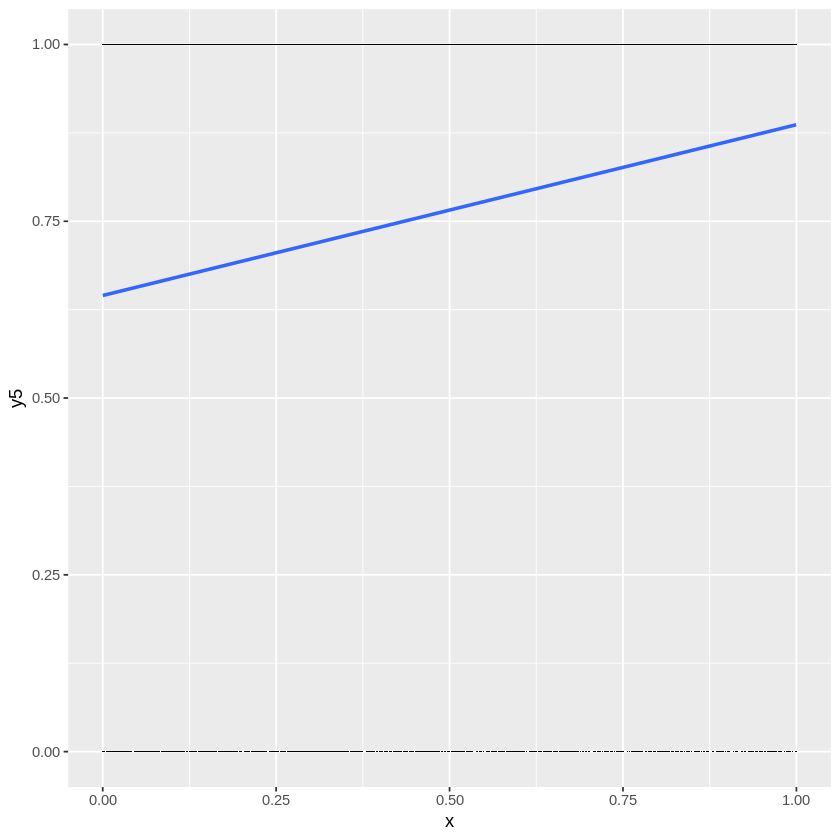

In [22]:
ggplot() +
  geom_point(aes(x = x, y = y5), shape = '.') +
  geom_smooth(aes(x = x, y = y5),method='lm', se = FALSE)

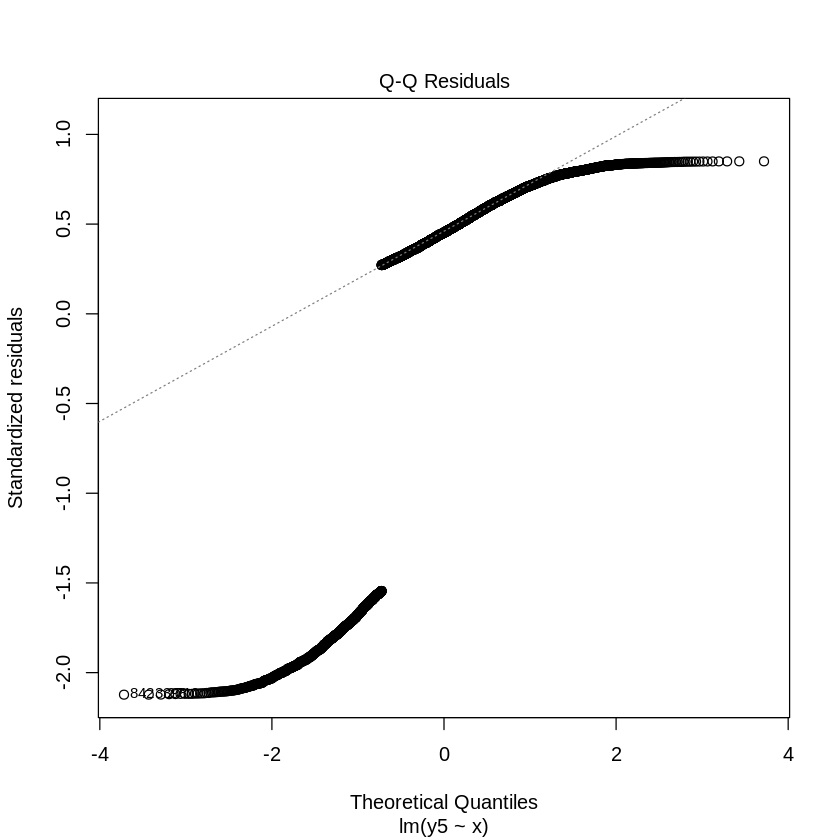

In [ ]:
fit_ex5 <- lm(y5~x)
plot(fit_ex5, which = 2)

In [ ]:
# If Y is discrete or binary, we need to think about the probability model.

# Implications

If:

* The response $Y$ is continuous;
* Sample size is large;

Then violations of strict normality are not terribly problematic and STAT 360 methods can be used. ***If***, however:

* The response $Y$ is discrete,

then more advanced modeling approaches are appropriate.  To use these advanced models, which are called *generalized linear models*, we first need to understand a little bit about statistical probability models.

# What's next?

Coming up, we need to discuss *probability models*: mathematical formulae that describe the likelihood of certain $Y$, depending on whether $Y$ is a count, a binary variable, or a continuous variable.  